======= Naïve-Bayes Model =======

Model Accuracy:
 0.983786659989358

Confusion matrix 4x4:
 [[31265    89   136    12]
 [    1    27    12   260]
 [    0     0     2     0]
 [    6     0     2   137]]

Confusion matrix 2x2:
 [[31265   237]
 [    7   440]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     31502
           1       0.23      0.09      0.13       300
           2       0.01      1.00      0.03         2
           3       0.33      0.94      0.49       145

    accuracy                           0.98     31949
   macro avg       0.40      0.76      0.41     31949
weighted avg       0.99      0.98      0.99     31949




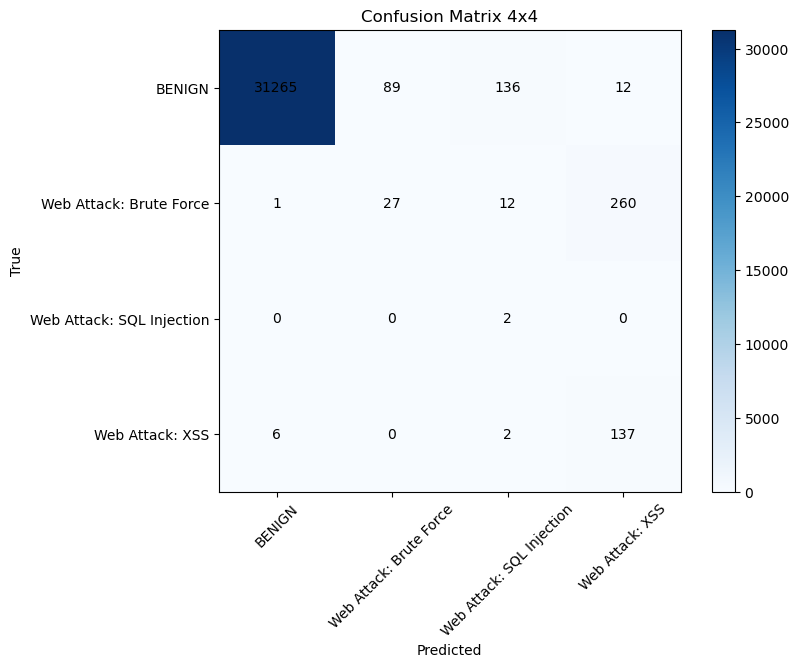

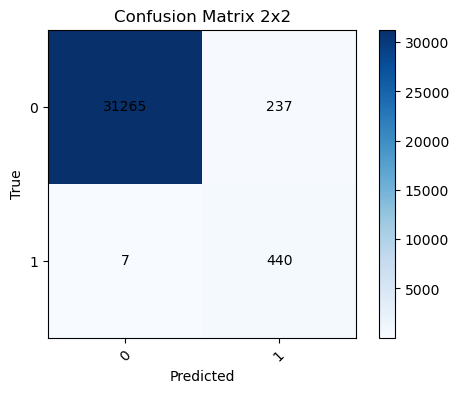

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Map label values to corresponding attack names
label_mapping = {
    0: 'BENIGN',
    1: 'Web Attack: Brute Force',
    2: 'Web Attack: SQL Injection',
    3: 'Web Attack: XSS'
}
df['Label'] = df['Label'].map(label_mapping)

# Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column (labels)

# Encode labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Perform SMOTE oversampling on the training set
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Create and train the Naïve-Bayes model
model = GaussianNB()
model.fit(X_train_scaled, y_train_resampled)

# Predict the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_matrix_4x4 = confusion_matrix(y_test, y_pred)

# Calculate values for the 2x2 confusion matrix
TN = confusion_matrix_4x4[0, 0]  # True Negatives (0, 0)
FP = np.sum(confusion_matrix_4x4[0, 1:])  # False Positives (0, 1)
FN = np.sum(confusion_matrix_4x4[1:, 0])  # False Negatives (1, 0)
TP = np.sum(confusion_matrix_4x4[1:, 1:])  # True Positives (1, 1)
confusion_matrix_2x2 = np.array([[TN, FP], [FN, TP]])

classification = classification_report(y_test, y_pred)

# Plot the confusion matrix 4x4
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix_4x4, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix 4x4')
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, ['BENIGN', 'Web Attack: Brute Force', 'Web Attack: SQL Injection', 'Web Attack: XSS'], rotation=45)
plt.yticks(tick_marks, ['BENIGN', 'Web Attack: Brute Force', 'Web Attack: SQL Injection', 'Web Attack: XSS'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(confusion_matrix_4x4[i, j]), horizontalalignment='center', verticalalignment='center')

# Plot the confusion matrix 2x2
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix_2x2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix 2x2')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=45)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_matrix_2x2[i, j]), horizontalalignment='center', verticalalignment='center')

# Print the model's evaluation results
print('======= Naïve-Bayes Model =======')
print()
print("Model Accuracy:\n", accuracy)
print()
print("Confusion matrix 4x4:\n", confusion_matrix_4x4)
print()
print("Confusion matrix 2x2:\n", confusion_matrix_2x2)
print()
print("Classification report:\n", classification)
print()


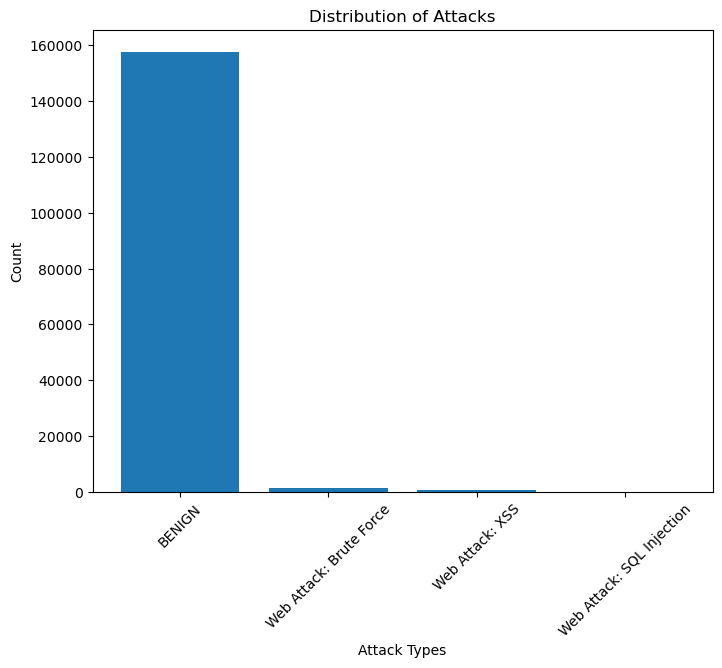

In [3]:
# Count the occurrences of each attack class
attack_counts = df['Label'].value_counts()

# Create a bar plot to visualize the distribution of attacks
plt.figure(figsize=(8, 6))
plt.bar(attack_counts.index, attack_counts.values)
plt.title('Distribution of Attacks')
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Create a DataFrame to store the evaluation metrics
evaluation_data = pd.DataFrame({
    'Model': ['Naive Bayes'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-score': [f1]
})

# Save the evaluation metrics to a CSV file
evaluation_data.to_csv('evaluation_results_NB.csv', index=False)

In [7]:
print(evaluation_data)

         Model  Accuracy  Precision    Recall  F1-score
0  Naive Bayes  0.983787   0.989495  0.983787  0.985642
